In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('flights.csv')

## Информация о DataFrame

<b>flight_id - Индефикатор рейса</b><br>
<b>flight_no - Номер рейса</b><br>
<b>status - Статус рейса</b><br>
<b>actual_departure - Дата вылета рейса</b><br>
<b>city_arrival_airport - Место назначение</b><br>
<b>count_seat - Количество купленых мест на рейс </b><br>
<b>count_seat_all - Всего мест на судне</b><br>
<b>count_minute_flight - Время в минутах затраченого на рейс</b><br>
<b>sum_amount -  Доход полученый за рейс </b><br>
<b>model_aircraft - Модель самолёта</b><br>
<b>flight_range - Растояние на которое самолёт может летать</b><br>

## Предобработка данных

In [4]:
df.head(5)

,flight_id,flight_no,status,actual_departure,city_arrival_airport,count_seat,count_seat_all,count_minute_flight,sum_amount,model_aircraft,flight_range
0,136119,PG0252,Arrived,2017-01-03T10:08:00Z,Moscow,113.0,130,100.0,1653000.0,Boeing 737-300,4200
1,136120,PG0252,Arrived,2017-02-24T10:07:00Z,Moscow,109.0,130,100.0,1605400.0,Boeing 737-300,4200
2,136122,PG0252,Arrived,2017-01-08T10:08:00Z,Moscow,97.0,130,100.0,1431000.0,Boeing 737-300,4200
3,136130,PG0252,Arrived,2017-02-13T10:07:00Z,Moscow,107.0,130,100.0,1556600.0,Boeing 737-300,4200
4,136131,PG0252,Arrived,2017-01-28T10:07:00Z,Moscow,124.0,130,100.0,1812800.0,Boeing 737-300,4200


Из приведённой выше, выгрузки данных, видно столбец <b>actual_departure</b> содержит информацию о дате. Возмём только месяц и день, для анализа нам нужены только они, так как мы смотрим в разрезе одного года и одного сезона. Создадим два новых столбца:<br>
<b>actual_departure_month - Месяц вылета </b> <br>
<b>actual_departure_day - День вылета </b>

## Функции

In [5]:
'''Разбивает строку по определённому символу'''
def str_int_data(str_,symbol,number):
    return int(str_.split(symbol)[0].split('-')[number])

'''Расчёт средних значений по рейсам'''
def calculation_of_averages(df):
    maen_seat = df['count_seat'].mean()
    percent = maen_seat/df['count_seat_all'].mean()
    mean_amount = df['sum_amount'].mean()
    minute = df['count_minute_flight'].mean()
    km = minute/60*800
    amount_km = (mean_amount/maen_seat)/km
    
    print(maen_seat,'- Среднее значение купленых мест на рейс')
    print(percent,'% - заполненость самолёта')
    print(df['count_seat_all'].mean(),'- Количество мест в самолёте')
    print(mean_amount,'- Среднее значение стоимости перелёта')
    print(mean_amount/maen_seat,'- Среднее занчение стоимости одного билета')
    print(minute,'- Минут продолжительность рейса')
    print(km,'- Растояние в км')
    print(amount_km,'Среднея стоимость за километр с пассажира')
    
    
'''Расчёт количества топлива в денежной еденице'''
def amount_of_fuel_flight(model_aircraft,count_minute_flight):
    if model_aircraft == 'Boeing 737-300':
        return (count_minute_flight/60)*2.4*36900
    else :
        return (count_minute_flight/60)*1.7*36900

In [6]:
# Изменяем значение в столбце дата
df['actual_departure_month'] = df['actual_departure'].apply(lambda str_data: str_int_data(str_data,'T',1))
df['actual_departure_day'] = df['actual_departure'].apply(lambda str_data: str_int_data(str_data,'T',2))

In [7]:
df = df.drop(['actual_departure'], axis = 1)

In [8]:
df.head(5)

,flight_id,flight_no,status,city_arrival_airport,count_seat,count_seat_all,count_minute_flight,sum_amount,model_aircraft,flight_range,actual_departure_month,actual_departure_day
0,136119,PG0252,Arrived,Moscow,113.0,130,100.0,1653000.0,Boeing 737-300,4200,1,3
1,136120,PG0252,Arrived,Moscow,109.0,130,100.0,1605400.0,Boeing 737-300,4200,2,24
2,136122,PG0252,Arrived,Moscow,97.0,130,100.0,1431000.0,Boeing 737-300,4200,1,8
3,136130,PG0252,Arrived,Moscow,107.0,130,100.0,1556600.0,Boeing 737-300,4200,2,13
4,136131,PG0252,Arrived,Moscow,124.0,130,100.0,1812800.0,Boeing 737-300,4200,1,28


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   flight_id               127 non-null    int64  
 1   flight_no               127 non-null    object 
 2   status                  127 non-null    object 
 3   city_arrival_airport    127 non-null    object 
 4   count_seat              118 non-null    float64
 5   count_seat_all          127 non-null    int64  
 6   count_minute_flight     127 non-null    float64
 7   sum_amount              118 non-null    float64
 8   model_aircraft          127 non-null    object 
 9   flight_range            127 non-null    int64  
 10  actual_departure_month  127 non-null    int64  
 11  actual_departure_day    127 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 12.0+ KB


Из запроса <b>df.info()</b> видно что база содержит 127 строк и стобцы <b>count_seat</b> и <b>sum_amount</b> содежат пропуски
заменим значение nan на 0 и и выгрузим их.

In [9]:
df = df.fillna(0)

In [10]:
df[df['count_seat']==0]

,flight_id,flight_no,status,city_arrival_airport,count_seat,count_seat_all,count_minute_flight,sum_amount,model_aircraft,flight_range,actual_departure_month,actual_departure_day
59,136511,PG0194,Arrived,Novokuznetsk,0.0,130,305.0,0.0,Boeing 737-300,4200,2,21
60,136513,PG0194,Arrived,Novokuznetsk,0.0,130,305.0,0.0,Boeing 737-300,4200,2,28
61,136514,PG0194,Arrived,Novokuznetsk,0.0,130,305.0,0.0,Boeing 737-300,4200,2,7
62,136523,PG0194,Arrived,Novokuznetsk,0.0,130,305.0,0.0,Boeing 737-300,4200,1,10
63,136540,PG0194,Arrived,Novokuznetsk,0.0,130,305.0,0.0,Boeing 737-300,4200,1,17
64,136544,PG0194,Arrived,Novokuznetsk,0.0,130,305.0,0.0,Boeing 737-300,4200,1,31
65,136546,PG0194,Arrived,Novokuznetsk,0.0,130,305.0,0.0,Boeing 737-300,4200,1,3
66,136560,PG0194,Arrived,Novokuznetsk,0.0,130,305.0,0.0,Boeing 737-300,4200,1,24
67,136567,PG0194,Arrived,Novokuznetsk,0.0,130,305.0,0.0,Boeing 737-300,4200,2,14


Из выгрузки видно, что все данные принадлежат одному рейсу с направлением в <b>Novokuznetsk</b> 

Для чтобы убрать пропуски проанализируем среднии показатели других рейсов.

In [11]:
# Среднии показатели по Москве
calculation_of_averages(df[df['city_arrival_airport']=='Moscow'])

113.11864406779661 - Среднее значение купленых мест на рейс
0.8701434159061278 % - заполненость самолёта
130.0 - Количество мест в самолёте
1642576.2711864407 - Среднее значение стоимости перелёта
14520.827090200779 - Среднее занчение стоимости одного билета
100.0 - Минут продолжительность рейса
1333.3333333333335 - Растояние в км
10.890620317650583 Среднея стоимость за километр с пассажира


In [12]:
# Средние показатели по Белгороду
calculation_of_averages(df[df['city_arrival_airport']=='Belgorod'])

90.1864406779661 - Среднее значение купленых мест на рейс
0.9297571203914031 % - заполненость самолёта
97.0 - Количество мест в самолёте
710435.593220339 - Среднее значение стоимости перелёта
7877.410261229093 - Среднее занчение стоимости одного билета
50.0 - Минут продолжительность рейса
666.6666666666667 - Растояние в км
11.816115391843638 Среднея стоимость за километр с пассажира


1) Нам нужно занть сколько в среднем авикомпания в процентном соотношении отправляет рейсы. Найдём это <b>(число купленых / всего мест *100)</b><br>
2) Найдём среднее арефметическое по рейсам <b>((рейсA + рейсB) / количество)</b><br>
3) Найдём примерное среднее заполненость мест на рейс <b>Novokuznetsk</b> умножив на количество мест результат из второго пункта /100 <br>
4) Из стороних сайтов можно узнать что крейсерская скорость самолётов в основном 800км./ч.  изходя из этой информации количкество километров до города <b>t/60*V=S</b> и стоимость перелёта путём получения средне арифметического из показателей за другие рейсы <br>

In [13]:
Moscow = 113/130*100 # % - Moscow заполненость самолёта
Belgorod = 90/97*100 # % - Belgorod заполненость самолёта
Novokuznetsk = (Belgorod+Moscow)/2 # % - Novokuznetsk заполненость самолёта
seat_flight = 130*0.9 # - Среднее значение купленых мест на рейс Novokuznetsk
km = (df[df['city_arrival_airport']=='Novokuznetsk']['count_minute_flight'].mean()/60)*800 # - Растояние в км
amount_km = (10.9+11.82)/2 # - Среднея стоимость за километр с пассажира

print(Moscow,'% - Moscow заполненость самолёта')
print(Belgorod,'% - Belgorod заполненость самолёта')
print(Novokuznetsk,'% - Novokuznetsk заполненость самолёта')
print(seat_flight,'- Среднее значение купленых мест на рейс Novokuznetsk')
print(km,'- Растояние в км')
print(amount_km,' - Среднея стоимость за километр с пассажира')
print(amount_km*km*seat_flight,'- Среднее значение стоимости перелёта')

86.92307692307692 % - Moscow заполненость самолёта
92.78350515463917 % - Belgorod заполненость самолёта
89.85329103885805 % - Novokuznetsk заполненость самолёта
117.0 - Среднее значение купленых мест на рейс Novokuznetsk
4066.6666666666665 - Растояние в км
11.36  - Среднея стоимость за километр с пассажира
5405087.999999999 - Среднее значение стоимости перелёта


Получив данные внесём их в нашу базу

In [14]:
# Заполнем количество купленых мест на рейс
df['count_seat'] = df['count_seat'].apply(lambda x : 117 if x==0.0 else x)

In [15]:
# Заполняем стоимость перелёта
df['sum_amount'] = df['sum_amount'].apply(lambda x : (11.36*4066.7*117) if x==0.0 else x)

In [16]:
df[df['city_arrival_airport']=='Novokuznetsk'].head(9)

,flight_id,flight_no,status,city_arrival_airport,count_seat,count_seat_all,count_minute_flight,sum_amount,model_aircraft,flight_range,actual_departure_month,actual_departure_day
59,136511,PG0194,Arrived,Novokuznetsk,117.0,130,305.0,5405132.304,Boeing 737-300,4200,2,21
60,136513,PG0194,Arrived,Novokuznetsk,117.0,130,305.0,5405132.304,Boeing 737-300,4200,2,28
61,136514,PG0194,Arrived,Novokuznetsk,117.0,130,305.0,5405132.304,Boeing 737-300,4200,2,7
62,136523,PG0194,Arrived,Novokuznetsk,117.0,130,305.0,5405132.304,Boeing 737-300,4200,1,10
63,136540,PG0194,Arrived,Novokuznetsk,117.0,130,305.0,5405132.304,Boeing 737-300,4200,1,17
64,136544,PG0194,Arrived,Novokuznetsk,117.0,130,305.0,5405132.304,Boeing 737-300,4200,1,31
65,136546,PG0194,Arrived,Novokuznetsk,117.0,130,305.0,5405132.304,Boeing 737-300,4200,1,3
66,136560,PG0194,Arrived,Novokuznetsk,117.0,130,305.0,5405132.304,Boeing 737-300,4200,1,24
67,136567,PG0194,Arrived,Novokuznetsk,117.0,130,305.0,5405132.304,Boeing 737-300,4200,2,14


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   flight_id               127 non-null    int64  
 1   flight_no               127 non-null    object 
 2   status                  127 non-null    object 
 3   city_arrival_airport    127 non-null    object 
 4   count_seat              127 non-null    float64
 5   count_seat_all          127 non-null    int64  
 6   count_minute_flight     127 non-null    float64
 7   sum_amount              127 non-null    float64
 8   model_aircraft          127 non-null    object 
 9   flight_range            127 non-null    int64  
 10  actual_departure_month  127 non-null    int64  
 11  actual_departure_day    127 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 12.0+ KB


Теперь из запроса <b>df.info()</b> видно что база содержит 127 строк  без пустых знаений. 

## Аналитика рейсов

,,,count
city_arrival_airport,flight_no,model_aircraft,
Belgorod,PG0480,Sukhoi Superjet-100,59
Moscow,PG0252,Boeing 737-300,59
Novokuznetsk,PG0194,Boeing 737-300,9


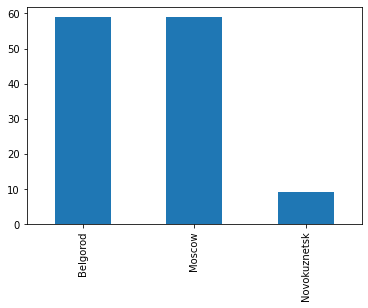

In [24]:
# Групирорвка по городам количество рейсов
df['city_arrival_airport'].value_counts().plot(kind='bar')
# df['city_arrival_airport'].value_counts()
df.groupby(['city_arrival_airport','flight_no','model_aircraft'])['flight_id'].agg(['count'])


Из запроса видно что самые востребованные рейсы это Москва и Белгород. Они состовляю большую часть всех рейсов

,sum
city_arrival_airport,
Belgorod,4.191570e+07
Moscow,9.691200e+07
Novokuznetsk,4.864619e+07


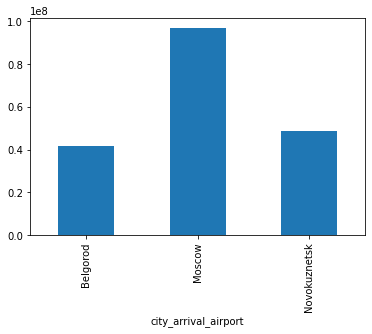

In [27]:
# Групировка по городам с результатом дохода за всё время гистограмма
df.groupby(['city_arrival_airport'])['sum_amount'].sum().plot(kind='bar')
# Групировка по городам с результатом дохода за всё время
df.groupby(['city_arrival_airport'])['sum_amount'].agg(['sum'])


Из запроса видно больше всех рейсов доход приносит рейс в Москву, а Белгород и Новокузнецк каждый в половину меньше.
Так как это только доход то сложно оценить прибыль компании, найдём расход на топлива затраченного не рейс.<br>
Из стороних сайтов можно узнать что в среднем топливо в 2017 году стоило  36900 т.руб. за тонну, а расход топлива у <b>Боинга - 2,4 тонны/час</b> <b> СуперДжет 100 - 1,7 тонны/час</b>. Зная количество времени проведённого в пути можно узнать сколько топлива ему понадобилось и какие затраты авикомпания несёт за рейс<br>
Найдём эти занчения и добавим их в базу новый столбец:<br> 
<b>amount_of_fuel_flight - сумма топлива на рейс </b><br>
<b>profit - прибыль компании </b>

In [28]:
# Создание сотлбца amount_of_fuel_flight - сумма топлива на рейс
df['amount_of_fuel_flight'] = df.apply(lambda x: amount_of_fuel_flight(x['model_aircraft'], x['count_minute_flight']), axis = 1)

In [29]:
# Создание сотлбца profit - прибыль компании
df['profit'] = df['sum_amount'] - df['amount_of_fuel_flight']

In [30]:
df.head(9)

,flight_id,flight_no,status,city_arrival_airport,count_seat,count_seat_all,count_minute_flight,sum_amount,model_aircraft,flight_range,actual_departure_month,actual_departure_day,amount_of_fuel_flight,profit
0,136119,PG0252,Arrived,Moscow,113.0,130,100.0,1653000.0,Boeing 737-300,4200,1,3,147600.0,1505400.0
1,136120,PG0252,Arrived,Moscow,109.0,130,100.0,1605400.0,Boeing 737-300,4200,2,24,147600.0,1457800.0
2,136122,PG0252,Arrived,Moscow,97.0,130,100.0,1431000.0,Boeing 737-300,4200,1,8,147600.0,1283400.0
3,136130,PG0252,Arrived,Moscow,107.0,130,100.0,1556600.0,Boeing 737-300,4200,2,13,147600.0,1409000.0
4,136131,PG0252,Arrived,Moscow,124.0,130,100.0,1812800.0,Boeing 737-300,4200,1,28,147600.0,1665200.0
5,136132,PG0252,Arrived,Moscow,116.0,130,100.0,1714000.0,Boeing 737-300,4200,2,15,147600.0,1566400.0
6,136135,PG0252,Arrived,Moscow,115.0,130,100.0,1678600.0,Boeing 737-300,4200,2,1,147600.0,1531000.0
7,136146,PG0252,Arrived,Moscow,109.0,130,100.0,1604200.0,Boeing 737-300,4200,2,9,147600.0,1456600.0
8,136159,PG0252,Arrived,Moscow,115.0,130,100.0,1700600.0,Boeing 737-300,4200,1,4,147600.0,1553000.0


,sum
city_arrival_airport,
Belgorod,3.883148e+07
Moscow,8.820360e+07
Novokuznetsk,4.459457e+07


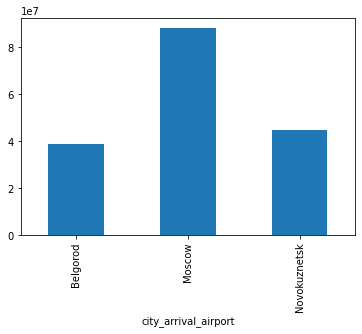

In [31]:
# Групировка по городам с результатом прибыли гистограмма
df.groupby(['city_arrival_airport'])['profit'].sum().plot(kind='bar')
# Групировка по городам с результатом прибыли
df.groupby(['city_arrival_airport'])['profit'].agg(['sum'])


Из запроса видно что самым прибыльным остаёться рейс в Москву а самым не прибыльным рейс в Белгород.<br>
Все рейсы получились прибыльными, но нам утверждали, что не все рейсы окупаються. Значит так как у нас небыло части нужной информации на рейс в Новокузнецк и мы её расчитали из средних знаений по рейсам то не можем с точностью утверждать что рейс в Новокузнецк и меет воторое место по прибыльнсти. Будем определять рентабельность рейса по затратам на топлива изходя из растояния. А эти данные у нас есть 

In [32]:
Moscow = 100/60*2.4*36900 # - Стоимость тобплива на рейс в Москву
Belgorod = 50/60*1.7*36900 # - Стоимость тобплива на рейс в Белгород
Novokuznetsk = 305/60*2.4*36900 # - Стоимость тобплива на рейс в Новокузнецк
print(Moscow,'- Стоимость тобплива на рейс в Москву')
print(Belgorod,'- Стоимость тобплива на рейс в Белгород')
print(Novokuznetsk,'- Стоимость тобплива на рейс в Новокузнецк')

147600.0 - Стоимость тобплива на рейс в Москву
52275.0 - Стоимость тобплива на рейс в Белгород
450180.0 - Стоимость тобплива на рейс в Новокузнецк


Из расчётов видно, что затраты на топливо большее всего  на рейс в Норкузнецк.

Узнаем количество совершаем рейсов в месяц

count  \
city_arrival_airport flight_no actual_departure_month model_aircraft               
Belgorod             PG0480    1                      Sukhoi Superjet-100     31   
                               2                      Sukhoi Superjet-100     28   
Moscow               PG0252    1                      Boeing 737-300          31   
                               2                      Boeing 737-300          28   
Novokuznetsk         PG0194    1                      Boeing 737-300           5   
                               2                      Boeing 737-300           4   

                                                                                 sum  
city_arrival_airport flight_no actual_departure_month model_aircraft                  
Belgorod             PG0480    1                      Sukhoi Superjet-100  1620525.0  
                               2                      Sukhoi Superjet-100  1463700.0  
Moscow               PG0252    1                      Boeing 737-300       4575600.0  
                               2                      Boeing 737-300       4132800.0  
Novokuznetsk         PG0194    1                      Boeing 737-300       2250900.0  
                               2                      Boeing 737-300       1800720.0

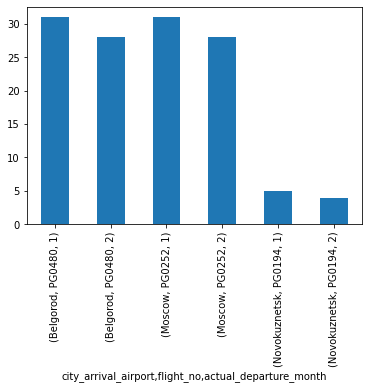

In [35]:
# Групировка по городам, рейсу и месяцу с результатом количество совершонных рейсов гистограмма
df.groupby(['city_arrival_airport','flight_no','actual_departure_month'])['flight_id'].count().plot(kind='bar')
# Групирорвка по городам количество рейсов
df.groupby(['city_arrival_airport','flight_no','actual_departure_month','model_aircraft'])['amount_of_fuel_flight'].agg(['count','sum'])

Из запроса видно самые актуальные рейсы это Москва и Белгород. Также видно, что рейсы в Белгород и Москву совершаються каждый день, а в Новокузнецк примерно один раз в 7 дней и на каждом рейсе(Москва, Белгород, Новокузнецк) один самолёт для этого рейса. Из ходя из этого можно предположить что рейсы Москва и Белгород совершают в сутки перелёт туда и братно, а рейс в Новокузнецк совершает перелёт туда и обратно один раз в 7 дней, что в пять раз меньше других. 

Согласно данным на рейс Новокузнецк и Москва используеться один вид самолёта. Так же если сравнить стоимость топлива на рейс траты на топлива до Москвы в три раза меньше чем до Новокузнецка. За то время которое самолёт простаивает можно его перенаправить на рейс до Москвы.<br> Так как самолёт у нас оди который летает до Новокузнецка и если не отменять это рейс то нужно учитывать, что самолёту нужно улитеть и вернуться обратно. Оценим какой интервал между рейсами до Новокузнецка.

count
actual_departure_month actual_departure_day       
1                      3                         1
                       10                        1
                       17                        1
                       24                        1
                       31                        1
2                      7                         1
                       14                        1
                       21                        1
                       28                        1

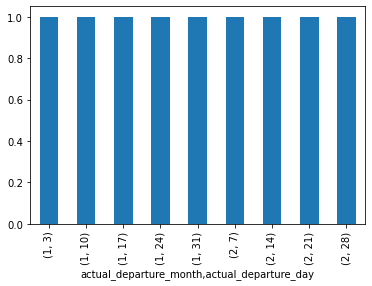

In [52]:
# Групировка по месяцу и дню и рузультат количество рейсов гистограмма
df[df['city_arrival_airport']=='Novokuznetsk'].groupby(['actual_departure_month','actual_departure_day'])['flight_id'].count().plot(kind='bar')
# Групировка по месяцу и дню и рузультат количество рейсов
df[df['city_arrival_airport']=='Novokuznetsk'].groupby(['actual_departure_month','actual_departure_day'])['flight_id'].agg(['count'])


Видно что интервал между рейсами до Новокузнецка сотовляет 7 дней.<br>

### Заключение
Так как чтоб рейс окупался то заполненость самолёта должна составлять определённый процент учитывая расходы. Рейс до Новокузнецка самый длительный для авиакомпании и не очень актуален в зимнее время и чтоб он компенсировал затраты как на топлива так и другие то необходимо определённое время для заполнения рейса. Из даных мы определили что рейс до Новокузнецка в ожидании заполнения находиться в аэропорту в простое.<br>
<br>
<b>Минимальные возможности:</b><br>
Будем преполагать, что рейс через 3,5 дня улитает в Новокузнецк и потом находясь в аэропорту Новокузнецка ждёт пока не набёрёться опредёлённое количество пассажиров. Изходя из нашего предположения у нас есть 24 дня когда самолёт стоит у нас в аэропорту Анапы в простое, мы можем его перенаправить на рейсы в Москву. Что составить <b>1642576 * 24 = 39421824</b>  возможного дополнительного дохода авиакомпании <br>
<br>
<b>Максимальные возможности:</b><br>
Будем предплагать что рейс до Новокузнецка совершаеться так определённого числа он отправляеться в пункт назначения Новокузнецк и в этит же сутки обратно в Анапу. Изходя из этого самолёт в простое в аэропорту Анапа 48 дней и следовательно мы можем его перенаправить на рейс в Москву. Что составить <b>1642576 * 48 = 78 843 648</b> возможного дополнительного дохода авиакомпании<br>
<br>
Так как мы добавляем новый рейс на Москву вознивает проблема распределения пассижиров и нужно привлечь новых. Можно изменить аэропорт назначения в Москве и распределить два рейса на утрений вылет и вечерний, что даст комфорт для пассажиров по выбору времени. Это может поспособствовать притоку пассажиров которые пользовались услугами фирмами конкурентами.
